In [43]:
from pycaret.classification import *
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data/final.csv')
df.head()

,Tenure Months,Monthly Charges,Churn Score,CLTV,county,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,...,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Value
0,-1.236724,-0.362660,1.268402,-0.981675,18,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1,-1.277445,-1.527580,-0.357720,0.642199,18,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,-1.196004,0.506459,0.803796,-0.115215,18,0,0,1,1,1,...,0,0,0,0,0,1,0,1,0,0
3,1.084337,0.996690,-1.519235,0.708135,18,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
4,-1.114563,0.509783,-1.705078,0.697145,18,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [7]:
p_classifier = setup(data = df, target='Churn Value')

,Description,Value
0,session_id,5942
1,Target,Churn Value
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 33)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9168,0.9708,0.8750,0.8220,0.8474,0.7903,0.7913,0.0070
ada,Ada Boost Classifier,0.9318,0.9827,0.8749,0.8687,0.8713,0.8249,0.8254,0.0390
catboost,CatBoost Classifier,0.9347,0.9839,0.8695,0.8824,0.8754,0.8312,0.8317,1.1530
lightgbm,Light Gradient Boosting Machine,0.9304,0.9821,0.8657,0.8707,0.8677,0.8205,0.8209,0.0260
gbc,Gradient Boosting Classifier,0.9323,0.9836,0.8649,0.8777,0.8707,0.8248,0.8253,0.0950
rf,Random Forest Classifier,0.9325,0.9787,0.8511,0.8890,0.8691,0.8236,0.8244,0.1480
ridge,Ridge Classifier,0.9176,0.0000,0.8488,0.8414,0.8447,0.7887,0.7891,0.0050
qda,Quadratic Discriminant Analysis,0.8876,0.9457,0.8396,0.7607,0.7980,0.7204,0.7223,0.0060
lr,Logistic Regression,0.9168,0.9740,0.8389,0.8453,0.8419,0.7855,0.7856,0.5830
nb,Naive Bayes,0.8734,0.9349,0.8343,0.7273,0.7770,0.6892,0.6925,0.0050


In [22]:
best.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

### Model creation and tuning

#### 1 . Ada Boost

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [24]:
ada_boost = create_model('ada', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9432,0.9860,0.9000,0.8864,0.8931,0.8545,0.8545
1,0.9209,0.9788,0.8231,0.8699,0.8458,0.7927,0.7932
2,0.9381,0.9843,0.8851,0.8817,0.8834,0.8413,0.8413
3,0.9371,0.9829,0.8966,0.8699,0.8830,0.8400,0.8402
4,0.9280,0.9810,0.8736,0.8571,0.8653,0.8161,0.8162
Mean,0.9335,0.9826,0.8756,0.8730,0.8741,0.8289,0.8291
SD,0.0080,0.0025,0.0279,0.0102,0.0168,0.0219,0.0218


In [27]:
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 5942}

In [26]:
params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          }

tuned_ada_boost = tune_model(ada_boost, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9876,0.8692,0.9040,0.8863,0.8466,0.8469
1,0.9452,0.9895,0.8923,0.8992,0.8958,0.8586,0.8586
2,0.9310,0.9814,0.8462,0.8871,0.8661,0.8197,0.8201
3,0.9108,0.9782,0.7769,0.8707,0.8211,0.7619,0.7641
4,0.9310,0.9852,0.8385,0.8934,0.8651,0.8188,0.8196
5,0.9493,0.9869,0.8846,0.9200,0.9020,0.8678,0.8681
6,0.9452,0.9847,0.8846,0.9055,0.8949,0.8579,0.8580
7,0.9290,0.9811,0.8626,0.8692,0.8659,0.8176,0.8176
8,0.9108,0.9804,0.8397,0.8271,0.8333,0.7724,0.7724
9,0.9290,0.9854,0.8473,0.8810,0.8638,0.8158,0.8161


In [28]:
tuned_ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 80,
 'random_state': 5942}

#### 2. Linear Discriminant Analysis

In [29]:
lda = create_model('lda', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9341,0.9807,0.9308,0.8374,0.8816,0.8361,0.8383
1,0.9087,0.9679,0.8500,0.8125,0.8308,0.7684,0.7687
2,0.9219,0.9720,0.8659,0.8433,0.8544,0.8011,0.8012
3,0.9239,0.9693,0.8812,0.8394,0.8598,0.8077,0.8081
4,0.8966,0.9638,0.8467,0.7809,0.8125,0.7412,0.7424
Mean,0.9170,0.9707,0.8749,0.8227,0.8478,0.7909,0.7918
SD,0.0130,0.0057,0.0305,0.0235,0.0239,0.0329,0.0332


In [30]:
lda.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [32]:
params = {'solver':['svd', 'lsqr', 'eigen'] }

tuned_lda = tune_model(lda, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9290,0.9764,0.9154,0.8322,0.8718,0.8229,0.8246
1,0.9412,0.9856,0.9538,0.8435,0.8953,0.8546,0.8577
2,0.9108,0.9699,0.8615,0.8116,0.8358,0.7746,0.7753
3,0.9047,0.9663,0.8462,0.8029,0.8240,0.7587,0.7592
4,0.9087,0.9692,0.8538,0.8102,0.8315,0.7689,0.7694
5,0.9290,0.9747,0.8769,0.8571,0.8669,0.8185,0.8186
6,0.9249,0.9685,0.8769,0.8444,0.8604,0.8091,0.8094
7,0.9209,0.9687,0.8779,0.8333,0.8550,0.8007,0.8012
8,0.9067,0.9653,0.8779,0.7931,0.8333,0.7688,0.7707
9,0.8925,0.9631,0.8092,0.7910,0.8000,0.7265,0.7266


#### 3. Light Gradient Boosting Machine

In [35]:
lightgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9381,0.9862,0.8885,0.8783,0.8834,0.8413,0.8413
1,0.9189,0.9796,0.8269,0.8600,0.8431,0.7884,0.7887
2,0.9280,0.9826,0.8352,0.8862,0.8600,0.8116,0.8122
3,0.9249,0.9806,0.8506,0.8638,0.8571,0.8063,0.8063
4,0.9300,0.9810,0.8851,0.8556,0.8701,0.8222,0.8224
Mean,0.9280,0.9820,0.8573,0.8688,0.8627,0.8139,0.8142
SD,0.0063,0.0023,0.0253,0.0116,0.0134,0.0175,0.0174


In [36]:
lightgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 5942,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [37]:
params = {'n_estimators':range(50, 100, 10),
          'learning_rate':[0.001, 0.01, 0.1, 1.0],
          'num_leaves':range(20,60)
          }

tuned_lightgbm = tune_model(lightgbm, custom_grid = params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9473,0.9884,0.9154,0.8881,0.9015,0.8655,0.8657
1,0.9371,0.9858,0.9000,0.8667,0.8830,0.8400,0.8403
2,0.9351,0.9834,0.8692,0.8828,0.8760,0.8320,0.8321
3,0.9189,0.9772,0.8154,0.8689,0.8413,0.7868,0.7876
4,0.9290,0.9838,0.8615,0.8682,0.8649,0.8167,0.8167
5,0.9412,0.9851,0.8692,0.9040,0.8863,0.8466,0.8469
6,0.9270,0.9819,0.8385,0.8790,0.8583,0.8091,0.8095
7,0.9270,0.9800,0.8779,0.8519,0.8647,0.8147,0.8148
8,0.9331,0.9832,0.9389,0.8311,0.8817,0.8353,0.8383
9,0.9331,0.9840,0.8779,0.8712,0.8745,0.8289,0.8289


### Comparison of models

#### 1. Confusion Matrix

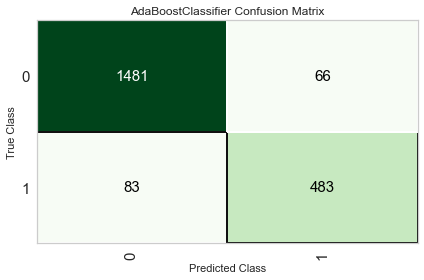

In [54]:

plot_model(tuned_ada_boost, plot = 'confusion_matrix')

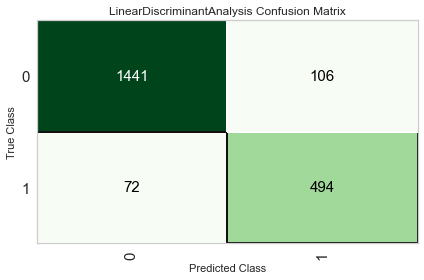

In [55]:
plot_model(tuned_lda, plot = 'confusion_matrix')

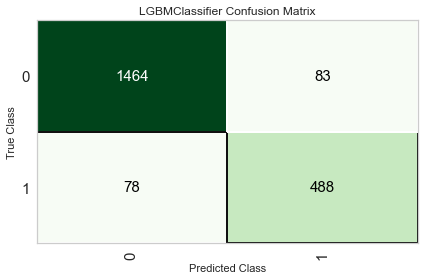

In [56]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [58]:
483/(83+483), 494/(72+494), 488/(78+488)

(0.8533568904593639, 0.872791519434629, 0.8621908127208481)

#### 2. Classification Report

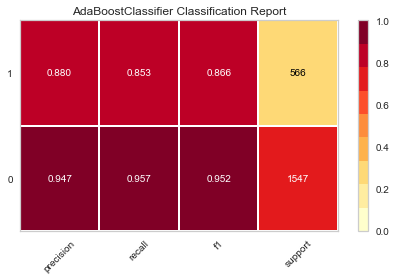

In [59]:
plot_model(tuned_ada_boost, plot = 'class_report')

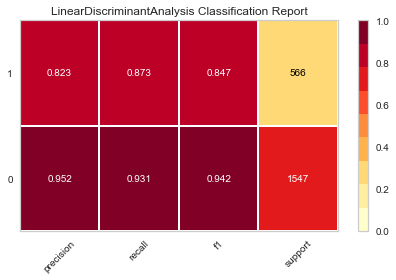

In [60]:
plot_model(tuned_lda, plot = 'class_report')

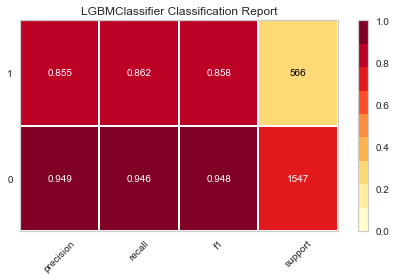

In [61]:
plot_model(tuned_lightgbm, plot = 'class_report')

For Telco Customer dataset, we are trying to create a model that predicts customer churn. The company is looking to idenitfy those cusomers who might churn and try to retain them with good offers as per retention policies. Here the main concern is correctly predicting Churn = 1. For a customer who is going to churn, if the model predicts churn = 0 (False Negative), the company fails to retain those customers. Hence, the evaluation metric most suitable for this scenario is Recall.

Based on the above comparisons, Linear Discriminant Analysis algorithm provides the best scores for Recall.

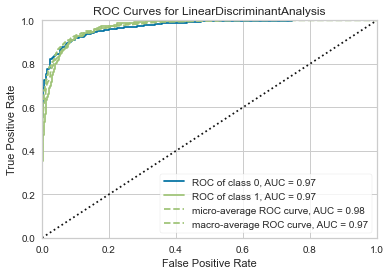

In [66]:
plot_model(tuned_lda, plot = 'auc')

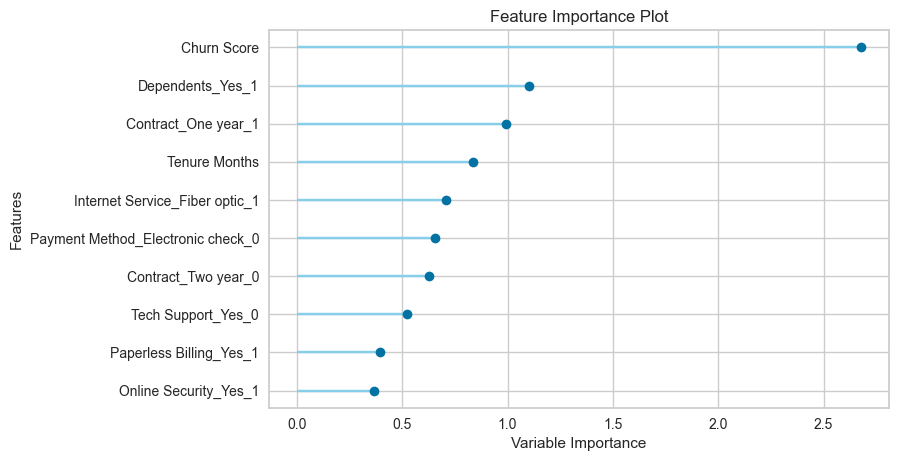

In [68]:
plot_model(tuned_lda, plot = 'feature')

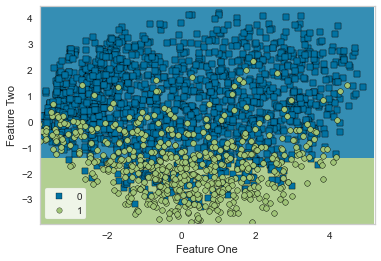

In [69]:
plot_model(tuned_lda, plot = 'boundary')

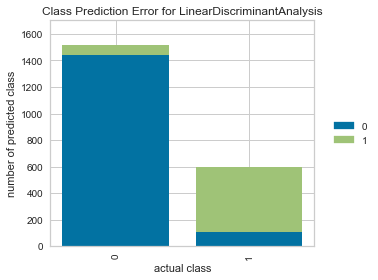

In [73]:
plot_model(tuned_lda, plot = 'error')

In [74]:
predict_model(tuned_lda);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9158,0.9714,0.8728,0.8233,0.8473,0.7892,0.7899


#### Clustering approach